# Customer Churn Classification Project 

**Overview:**
This project aims to analyze customer churn in a telecommunication company using classification models. We will explore and analyze the provided datasets to gain insights into factors influencing customer retention. The goal is to build machine learning models capable of predicting customer churn and offer valuable insights to the company for strategic decision-making.

**1.0 Business Understanding:**

   **1.1 Objective:**
   The main objective is to identify and understand factors influencing customer churn in the telecommunication industry. We aim to build effective classification models for predicting customer churn.  

**Features**
   - customerID -The unique id of each customer
   - gender -gender of the customer
   - SeniorCitizen -( age 50 and above)
   - Partner    -Whether the customer has a partner or not  
   - Dependents           
   - tenure              
   - PhoneService        
   - MultipleLines     
   - InternetService    
   - OnlineSecurity     
   - OnlineBackup       
   - DeviceProtection   
   - TechSupport        
   - StreamingTV        
   - StreamingMovies    
   - Contract           
   - PaperlessBilling     
   - PaymentMethod      
   - MonthlyCharges    
   - TotalCharges 
   - Churn     

**1.2 Hypothesis (Null and Alternate):**
   - Null Hypothesis (H0): There is no significant relationship between the Total Charges and customer churn.
   - Alternate Hypothesis (H1): There is a significant relationship between the Total Charges and customer churn.
   Ho : There seems to be no relationship between gender and whether the person is a senior citizen and the churn rate
   H1: There is a relationship between age and senior citizen and churn rate

   **1.3 Research/Analytical Questions:**
  
   - How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?
   - Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?
   - How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?
   - Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?
   - What insights can be gained from the analysis to improve customer retention?
   - Is there a relationship between gender and the churn rate
   - How does internet service affect churn rate?
   - Are senior citizens more likely to churn


**2.0 Data Understanding:**
 
   **2.1 Importation:**
   Import necessary libraries and modules for data analysis and machine learning.

In [15]:
# Data manipulation packages
import pandas as pd
import numpy as np

#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


# Database connection package
import pyodbc

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")


In [16]:
# Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
conn = pyodbc.connect(connection_string)

**2.2 Loading of Dataset:**
   Load the data from the SQL Server database and OneDrive.

In [18]:
query= "select * from dbo.LP2_Telco_churn_first_3000"

In [24]:
path = r"C:\Users\Graka\Downloads\churn_data.csv"

first_data = pd.read_csv(path)

In [7]:
first_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [26]:
url = r'C:\Users\Graka\Documents\LP2_Telco-churn-last-2000.csv'

third_data = pd.read_csv(url)

third_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


Standardizing columns before concatenating

In [27]:
first_data.dtypes

customerID           object
gender               object
SeniorCitizen          bool
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [28]:
third_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [29]:
# removing all non numeric columns from TotalCharges column
third_data['TotalCharges'] = pd.to_numeric(third_data['TotalCharges'], errors='coerce')
third_data['TotalCharges'] = third_data['TotalCharges'].fillna(0)
third_data['TotalCharges'] = third_data['TotalCharges'].astype(float)

In [30]:
first_data['Partner'] = first_data['Partner'].astype(object)
first_data['Dependents'] = first_data['Dependents'].astype(object)
first_data['PaperlessBilling'] = first_data['PaperlessBilling'].astype(object)
first_data['PhoneService'] = first_data['PhoneService'].astype(object)
third_data['SeniorCitizen'] = third_data['SeniorCitizen'].astype(bool)

In [31]:
# Merging two datasets
churn_data = pd.concat([first_data,third_data])

**2.3 EDA:**
   - Explore data (info, duplicated, null values, describe)

In [32]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   bool   
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [39]:
churn_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [33]:
churn_data.duplicated().sum()

0

In [35]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002
TotalCharges,5038.0,2300.692041,2269.502705,0.0,417.125,1400.699988,3860.599976,8670.100000


In [36]:
churn_data.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


In [38]:
churn_data.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095444
tenure,0.004597,1.000000,0.240645,0.826379
MonthlyCharges,0.221780,0.240645,1.000000,0.646927
TotalCharges,0.095444,0.826379,0.646927,1.000000


<Axes: ylabel='Frequency'>

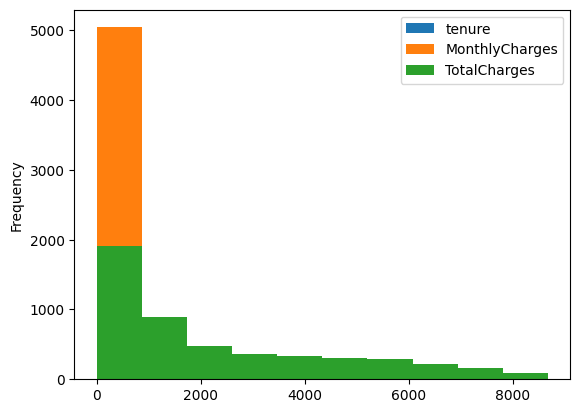

In [37]:
churn_data.plot(kind = 'hist')

**2.3.1 Univariate Analysis:**
     Explore individual variables for insights.

**Perfoming EDA on the data**


Univariate Analysis

<Axes: >

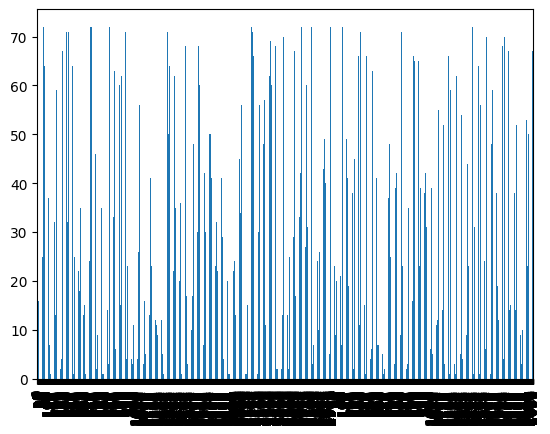

In [43]:
churn_data['tenure'].plot(kind = 'bar')

**2.3.2 Bivariate Analysis:**
     Investigate relationships between pairs of variables.
   
**2.3.3 Multivariate Analysis:**
     Examine interactions between three or more variables.

Bivariate Analysis

In [43]:
churn_data.corr

<bound method DataFrame.corr of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female          False    True      False       1   
1     5575-GNVDE    Male          False   False      False      34   
2     3668-QPYBK    Male          False   False      False       2   
3     7795-CFOCW    Male          False   False      False      45   
4     9237-HQITU  Female          False   False      False       2   
...          ...     ...            ...     ...        ...     ...   
2038  6840-RESVB    Male          False     Yes        Yes      24   
2039  2234-XADUH  Female          False     Yes        Yes      72   
2040  4801-JZAZL  Female          False     Yes        Yes      11   
2041  8361-LTMKD    Male           True     Yes         No       4   
2042  3186-AJIEK    Male          False      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           False               NaN             DSL 

In [ ]:
from pandas_profiling.profile_report import ProfileReport
 
profile = ProfileReport(churn_data,title = 'Customer churn Rate',html = {'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file("[Churnset] Pandas_Profiling_Report.html")